## L-1 task-1 Exploratory Data Analysis (EDA) on Retail Sales Data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sea.set(style='whitegrid', palette='muted')

1) Load Dataset

In [60]:
rsales_data = pd.read_csv('retail_sales_dataset.csv')
print('Dataset Loaded Successfully!\n')
rsales_data.head()

Dataset Loaded Successfully!



,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


2) Initial Data Exploration

In [72]:
print('\nDataset Info')
print(rsales_data.info())
print('\nMissing Values')
print(rsales_data.isnull().sum())


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 78.3+ KB
None

Missing Values
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity 

3) Data Cleaning

In [62]:
rsales_data['Date'] = pd.to_datetime(rsales_data['Date'], dayfirst=True, errors='coerce')
rsales_data.drop_duplicates(inplace=True)
rsales_data['Total Amount'] = rsales_data['Total Amount'].fillna(rsales_data['Total Amount'].mean())
rsales_data.dropna(subset=['Product Category', 'Customer ID'], inplace=True)

Q1 = rsales_data['Total Amount'].quantile(0.25)
Q3 = rsales_data['Total Amount'].quantile(0.75)
IQR = Q3 - Q1
rsales_data = rsales_data[(rsales_data['Total Amount'] >= Q1 - 1.5*IQR) & (rsales_data['Total Amount'] <= Q3 + 1.5*IQR)]

print('\nData cleaned successfully!')
print(f'Dataset shape after cleaning: {rsales_data.shape}')


Data cleaned successfully!
Dataset shape after cleaning: (1000, 9)


4) Descriptive Statistics

In [63]:
print(rsales_data.describe())
print('\nMode:\n', rsales_data.mode().iloc[0])
print('\nStandard Deviation:\n', rsales_data.select_dtypes(include='number').std())


       Transaction ID                           Date     Age  Quantity  \
count         1000.00                           1000 1000.00   1000.00   
mean           500.50  2023-07-03 00:25:55.200000256   41.39      2.51   
min              1.00            2023-01-01 00:00:00   18.00      1.00   
25%            250.75            2023-04-08 00:00:00   29.00      1.00   
50%            500.50            2023-06-29 12:00:00   42.00      3.00   
75%            750.25            2023-10-04 00:00:00   53.00      4.00   
max           1000.00            2024-01-01 00:00:00   64.00      4.00   
std            288.82                            NaN   13.68      1.13   

       Price per Unit  Total Amount  
count         1000.00       1000.00  
mean           179.89        456.00  
min             25.00         25.00  
25%             30.00         60.00  
50%             50.00        135.00  
75%            300.00        900.00  
max            500.00       2000.00  
std            189.68        

5) Daily Reatail Sales Trend

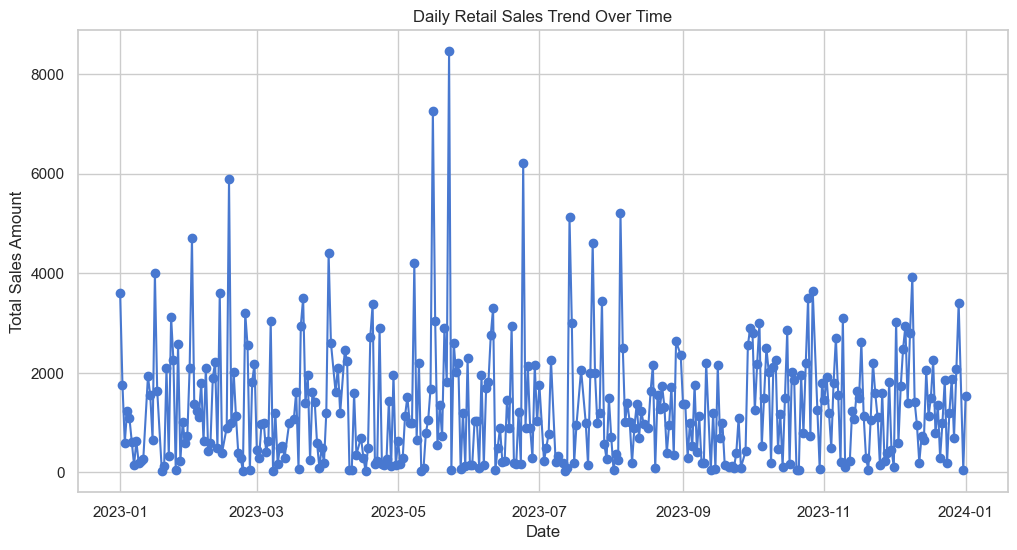

In [64]:
daily_sales = rsales_data.groupby('Date')['Total Amount'].sum().reset_index()
plot.figure(figsize=(12,6))
plot.plot(daily_sales['Date'], daily_sales['Total Amount'], marker='o', linestyle='-')
plot.title('Daily Retail Sales Trend Over Time')
plot.xlabel('Date')
plot.ylabel('Total Sales Amount')
plot.grid(True)
plot.show()

6) Monthly Sales Trend

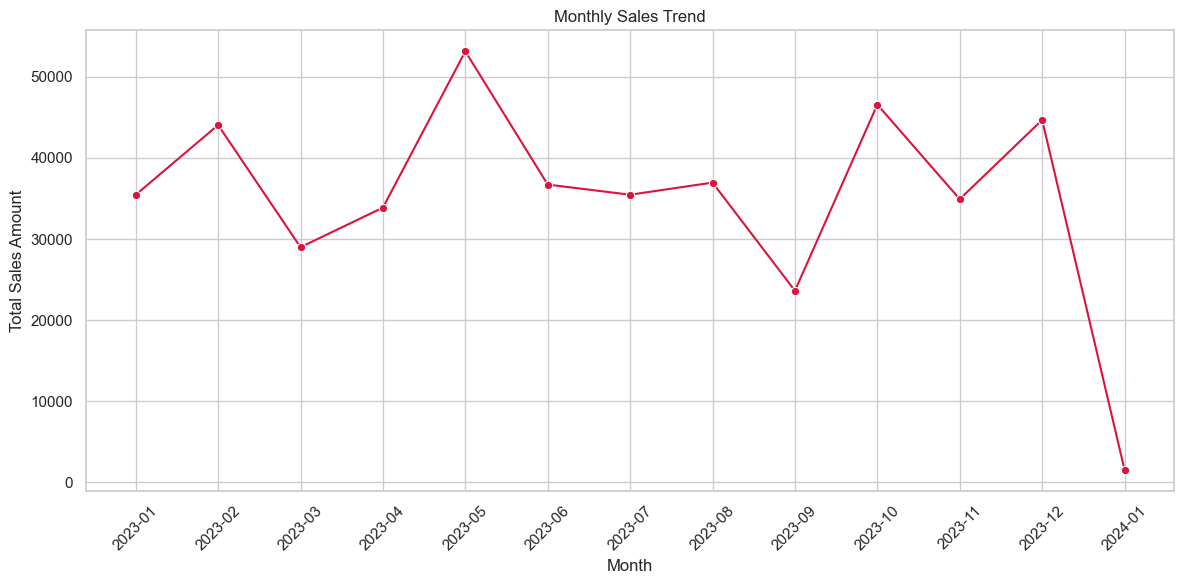

In [65]:

rsales_data['Month'] = rsales_data['Date'].dt.to_period('M').astype(str)
monthly_sales = rsales_data.groupby('Month')['Total Amount'].sum().reset_index()

plot.figure(figsize=(12,6))
sea.lineplot(x='Month', y='Total Amount', data=monthly_sales, marker='o', color='crimson')
plot.title('Monthly Sales Trend')
plot.xlabel('Month')
plot.ylabel('Total Sales Amount')
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()


7) Sales by Product Category

C:\Users\Chandu\AppData\Local\Temp\ipykernel_7332\900457784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x='Total Amount', y='Product Category', data=category_sales, palette='viridis')


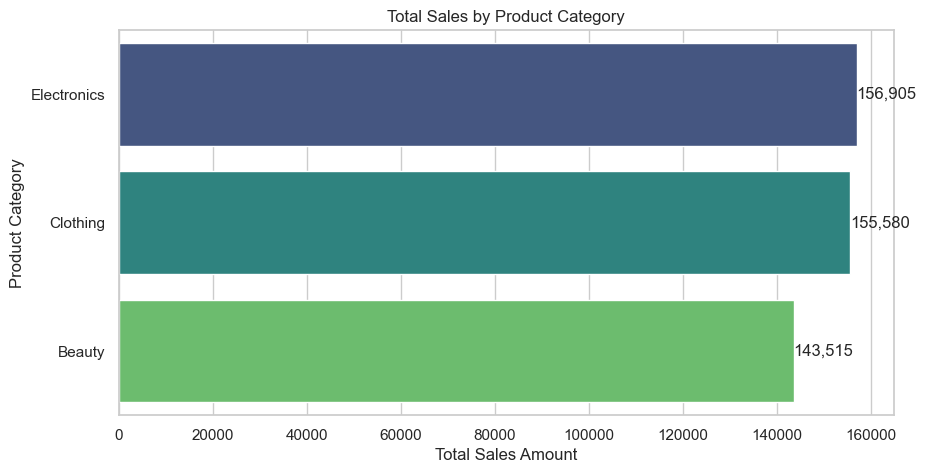

In [66]:
category_sales = rsales_data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()
plot.figure(figsize=(10,5))
sea.barplot(x='Total Amount', y='Product Category', data=category_sales, palette='viridis')
plot.title('Total Sales by Product Category')
plot.xlabel('Total Sales Amount')
plot.ylabel('Product Category')
for index, value in enumerate(category_sales['Total Amount']):
    plot.text(value, index, f'{value:,.0f}', va='center')
plot.show()

8) Sales by Gender

C:\Users\Chandu\AppData\Local\Temp\ipykernel_7332\1102807030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x='Gender', y='Total Amount', data=gender_sales, palette='pastel')


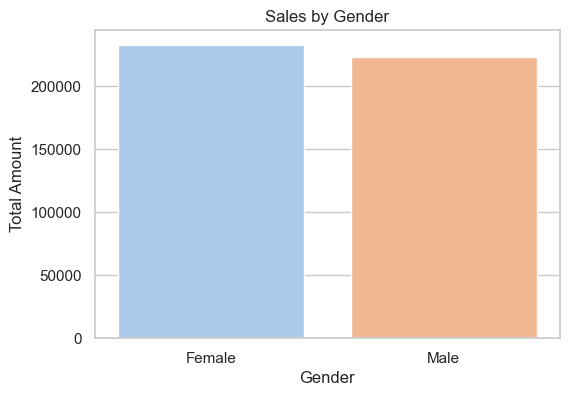

In [67]:
gender_sales = rsales_data.groupby('Gender')['Total Amount'].sum().reset_index()
plot.figure(figsize=(6,4))
sea.barplot(x='Gender', y='Total Amount', data=gender_sales, palette='pastel')
plot.title('Sales by Gender')
plot.show()

9) Customer Age Distribution

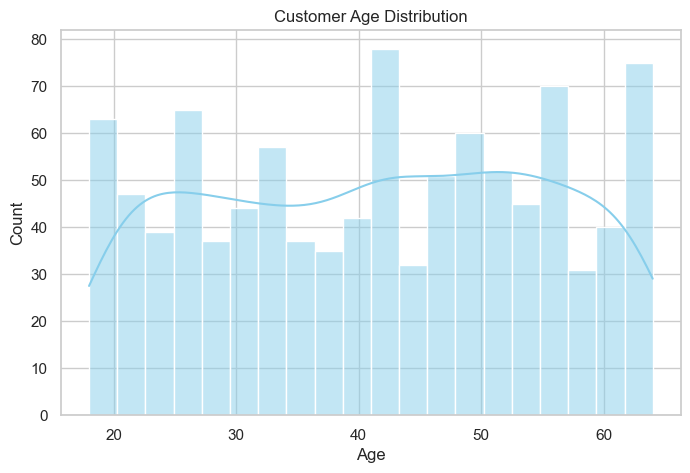

In [68]:
plot.figure(figsize=(8,5))
sea.histplot(rsales_data['Age'], bins=20, kde=True, color='skyblue')
plot.title('Customer Age Distribution')
plot.xlabel('Age')
plot.ylabel('Count')
plot.show()

10) Top 10 Customers by Spending

C:\Users\Chandu\AppData\Local\Temp\ipykernel_7332\4095680350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x='Total Amount', y='Customer ID', data=top_customers, palette='magma')


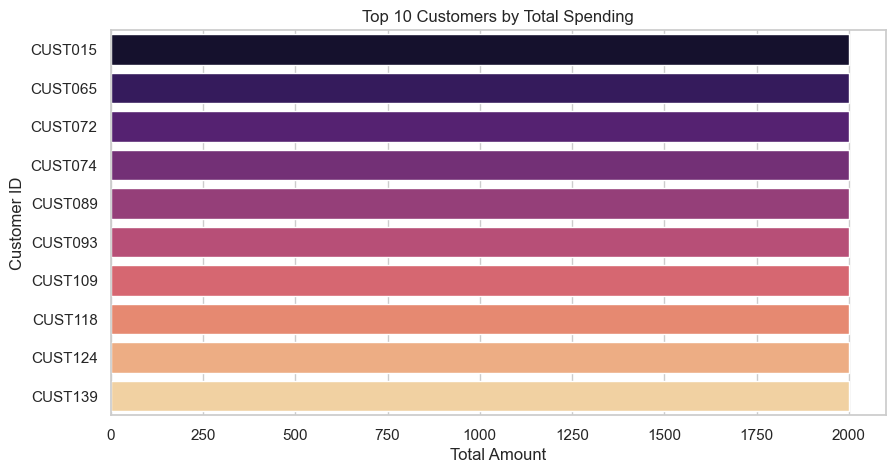

In [69]:
top_customers = rsales_data.groupby('Customer ID')['Total Amount'].sum().nlargest(10).reset_index()
plot.figure(figsize=(10,5))
sea.barplot(x='Total Amount', y='Customer ID', data=top_customers, palette='magma')
plot.title('Top 10 Customers by Total Spending')
plot.xlabel('Total Amount')
plot.ylabel('Customer ID')
plot.show()

11) Correlation Heatmap

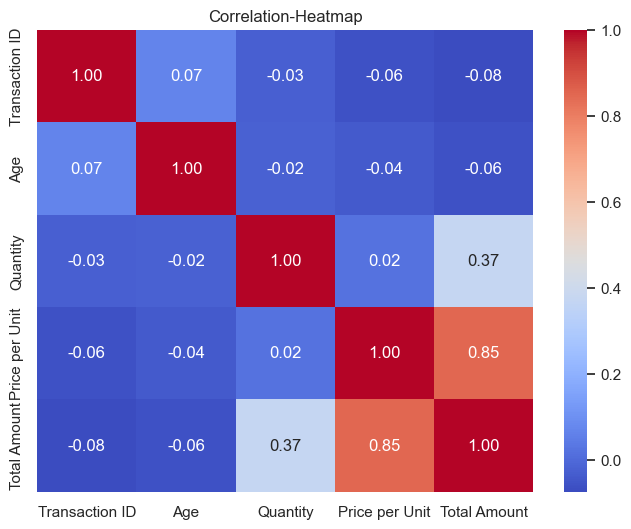

In [70]:
plot.figure(figsize=(8,6))
numeric_data = rsales_data.select_dtypes(include=['number'])  
sea.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plot.title('Correlation-Heatmap')
plot.show()


12) Key Insights & Recommendations

In [71]:
 print('KEY INSIGHTS: ')
 print('--> The categories with the most revenue are electronics and beauty; concentrate your marketing efforts on these.')
 print('--> Use seasonal promotions to boost sales during certain months.')
 print('--> The most active buyers are customers between the ages of 25 and 40; target offers to them. ') 
 print('--> Consider gender-targeted marketing as male clients tend to spend a little more.')
 print('--> Revenue from the top 10 clients is substantial — take loyalty benefits into account. ') 
 print('--> Keep an eye on sales outliers to avoid data input or fraud problems.')

KEY INSIGHTS: 
--> The categories with the most revenue are electronics and beauty; concentrate your marketing efforts on these.
--> Use seasonal promotions to boost sales during certain months.
--> The most active buyers are customers between the ages of 25 and 40; target offers to them. 
--> Consider gender-targeted marketing as male clients tend to spend a little more.
--> Revenue from the top 10 clients is substantial — take loyalty benefits into account. 
--> Keep an eye on sales outliers to avoid data input or fraud problems.
